# Classificação Multiclasse de desvio dos estudantes

## Conjunto de dados

Um conjunto de dados criado a partir de uma instituição de ensino superior (adquirido de vários bancos de dados distintos) relacionado a alunos matriculados em diferentes cursos de graduação, como agronomia, design, pedagogia, enfermagem, jornalismo, administração, serviço social e tecnologias. O conjunto de dados inclui informações conhecidas no momento da matrícula do aluno (trajetória acadêmica, dados demográficos e fatores socioeconômicos) e o desempenho acadêmico dos alunos ao final do primeiro e segundo semestres. Os dados são usados para construir modelos de classificação para prever a evasão e o sucesso acadêmico dos alunos. O problema é formulado como uma tarefa de classificação de três categorias, na qual há um forte desequilíbrio em relação a uma das classes.

## Carregando os dados

In [174]:
import pandas as pd

df_students = pd.read_csv("../data/dados_estudantes.csv")
df_students.head()

,Estado civil,Migração,Sexo,Idade na matrícula,Estrangeiro,Necessidades educacionais especiais,Devedor,Taxas de matrícula em dia,Bolsista,Taxa de desemprego,...,disciplinas 1º semestre (aprovadas),disciplinas 1º semestre (notas),disciplinas 1º semestre (sem avaliações),disciplinas 2º semestre (creditadas),disciplinas 2º semestre (matriculadas),disciplinas 2º semestre (avaliações),disciplinas 2º semestre (aprovadas),disciplinas 2º semestre (notas),disciplinas 2º semestre (sem avaliações),Target
0,Solteiro,Sim,Masculino,20,Não,Não,Não,Sim,Não,10.8,...,0,0.000000,0,0,0,0,0,0.000000,0,Desistente
1,Solteiro,Sim,Masculino,19,Não,Não,Não,Não,Não,13.9,...,6,14.000000,0,0,6,6,6,13.666667,0,Graduado
2,Solteiro,Sim,Masculino,19,Não,Não,Não,Não,Não,10.8,...,0,0.000000,0,0,6,0,0,0.000000,0,Desistente
3,Solteiro,Sim,Feminino,20,Não,Não,Não,Sim,Não,9.4,...,6,13.428571,0,0,6,10,5,12.400000,0,Graduado
4,Casado,Não,Feminino,45,Não,Não,Não,Sim,Não,13.9,...,5,12.333333,0,0,6,6,6,13.000000,0,Graduado


In [175]:
df_students.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 28 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Estado civil                              4424 non-null   object 
 1   Migração                                  4424 non-null   object 
 2   Sexo                                      4424 non-null   object 
 3   Idade na matrícula                        4424 non-null   int64  
 4   Estrangeiro                               4424 non-null   object 
 5   Necessidades educacionais especiais       4424 non-null   object 
 6   Devedor                                   4424 non-null   object 
 7   Taxas de matrícula em dia                 4424 non-null   object 
 8   Bolsista                                  4424 non-null   object 
 9   Taxa de desemprego                        4424 non-null   float64
 10  Taxa de inflação                    

## Exploração dos dados demográficos

In [176]:
df_students["Estado civil"].value_counts(normalize=True)*100

Estado civil
Solteiro               88.584991
Casado                  8.566908
Divorciado              2.056962
União Estável           0.565099
Legalmente Separado     0.135624
Viúvo                   0.090416
Name: proportion, dtype: float64

In [177]:
import plotly.express as px

hist_estado_civil = px.histogram(df_students, x="Idade na matrícula", title="Contagem de alunos matriculados por idade")
hist_estado_civil.show()

**Principais observações:**

- **Distribuição assimétrica à direita:** A maioria dos alunos está concentrada nas faixas etárias mais jovens (em torno de 20 anos), com o número de alunos diminuindo à medida que a idade aumenta. Isso indica que a instituição ou programa atrai principalmente indivíduos mais jovens.
- **Pico em torno de 18 anos:** A barra mais alta, representando o maior grupo de alunos, está em torno dos 18 anos. Isso sugere que essa idade é a mais comum para matrícula.
- **Poucos alunos mais velhos:** Há muito poucos alunos com mais de 50 anos, indicando que indivíduos mais velhos são menos propensos a se matricularem neste programa ou instituição.
- **Possíveis outliers:** Alguns alunos estão matriculados na faixa dos 60 e até 70 anos. Embora sejam outliers, eles podem representar um grupo demográfico único dentro do corpo discente.

**Possíveis explicações e implicações:**

- **Público-alvo:** A instituição pode ser especificamente projetado para alunos mais jovens.
- **Mudanças de carreira:** Os poucos alunos mais velhos podem ser indivíduos que buscam transições de carreira ou que buscam aprendizado ao longo da vida.
- **Estratégias de divulgação:** A instituição pode usar esses dados para adaptar seus esforços de divulgação e estratégias de marketing para atingir os grupos etários mais comuns.


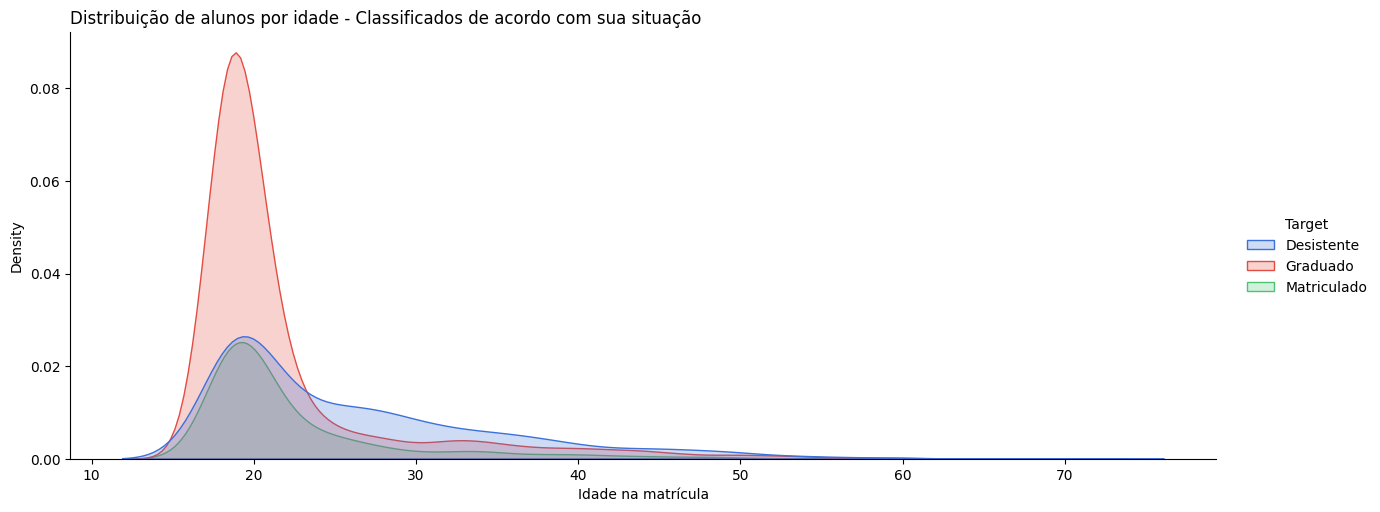

In [178]:
import matplotlib.pyplot as plt
import seaborn as sns

color_dict = {"Desistente": "#3b71db", "Graduado": "#e34c42", "Matriculado": "#4dc471"}
sns.set_palette(list(color_dict.values()))

hist_idade_matricula_target = sns.displot(
    df_students, x="Idade na matrícula", hue="Target", kind="kde", fill=True, aspect=2.5
)
plt.title("Distribuição de alunos por idade - Classificados de acordo com sua situação", loc="left")
plt.show()

Maioria dos alunos concentra-se na faixa etária de 18 a 25 anos: A curva de densidade para todas as categorias apresenta um pico pronunciado ao redor dos 20 anos, indicando que a maioria dos alunos ingressa na graduação logo após o término do ensino médio.

Alunos graduados tendem a ser mais jovens: A curva de densidade dos graduados é mais alta e estreita, com pico próximo aos 20 anos, sugerindo que alunos mais jovens têm maior probabilidade de concluir o curso.

Alunos desistentes e matriculados apresentam distribuição mais dispersa: As curvas de densidade para desistentes e matriculados são mais largas e achatadas, indicando maior variabilidade na idade desses alunos. Isso sugere que fatores além da idade influenciam a decisão de desistir ou permanecer matriculado.

Desistência é mais comum entre alunos mais velhos: A curva de densidade dos desistentes apresenta uma cauda mais longa à direita, indicando maior proporção de alunos com idade mais avançada nessa categoria. Isso pode refletir as dificuldades enfrentadas por alunos que retornam aos estudos após um período afastados, como conciliar trabalho e estudo, responsabilidades familiares, etc.

Maior diversidade de grupos dos alunos matriculados: A curva de densidade dos matriculados apresenta comportamento similar à dos desistentes, porém com menor proporção de alunos mais velhos. Isso sugere que essa categoria inclui alunos em diferentes fases do curso, com diferentes idades e tempos de permanência na instituição.

Considerações:

O gráfico demonstra a influência da idade na situação final dos alunos, mas não permite inferir causalidade. Outros fatores, como o curso escolhido, o histórico escolar, a situação socioeconômica, o suporte familiar, e a motivação pessoal, podem influenciar a decisão de desistir ou persistir na graduação.
A alta concentração de alunos jovens na categoria "Graduado" pode ser influenciada pela evasão de alunos mais velhos, resultando em um viés na amostra.
O desequilíbrio entre as categorias (mencionado na descrição do conjunto de dados) pode afetar a performance dos modelos de classificação. Técnicas de balanceamento de dados podem ser necessárias para melhorar a precisão das previsões.

In [179]:
df_students["Estrangeiro"].value_counts(normalize=True)*100

Estrangeiro
Não    97.513562
Sim     2.486438
Name: proportion, dtype: float64

In [180]:
df_students["Sexo"].value_counts(normalize=True)*100

Sexo
Feminino     64.82821
Masculino    35.17179
Name: proportion, dtype: float64

In [181]:
hist_sexo = px.histogram(df_students, x="Sexo", color="Target", barmode="group", title="Distribuição de alunos por sexo biológico")
hist_sexo.show()

Desistência: Observa-se uma quantidade similar de desistentes entre os sexos masculino e feminino, com uma leve vantagem para o sexo feminino. Isso sugere que o sexo biológico, por si só, não parece ser um fator determinante para a desistência.

Graduação: A quantidade de alunos graduados do sexo feminino é significativamente maior do que a do sexo masculino. Esse dado indica uma possível disparidade no sucesso acadêmico entre os sexos, com as mulheres apresentando maior índice de conclusão do curso.

Matriculados: A quantidade de alunos matriculados é similar entre os sexos, com uma leve vantagem para o sexo feminino. Isso sugere que a entrada na instituição é relativamente equilibrada entre os sexos.

**Desequilíbrio entre as classes:**

Como mencionado na descrição, existe um forte desequilíbrio em relação a uma das classes. Observando o gráfico, podemos inferir que a classe "Graduado" é a que apresenta maior número de alunos, seguida pela classe "Desistente", enquanto a classe "Matriculado" possui a menor quantidade de alunos. Esse desequilíbrio pode impactar a performance dos modelos de classificação, levando a uma tendência de predição para a classe majoritária (Graduado).

**Considerações:**

É importante ressaltar que este gráfico, isoladamente, não permite conclusões definitivas sobre a relação entre sexo biológico e sucesso acadêmico. Para uma análise mais aprofundada, seria necessário:

Investigar outros fatores que podem influenciar a evasão e o sucesso acadêmico, como dados demográficos, fatores socioeconômicos e trajetória acadêmica.
Analisar a distribuição dos alunos por sexo biológico dentro de cada curso, pois pode haver diferenças significativas entre áreas.
Avaliar a influência de outros fatores além do sexo biológico na disparidade de graduados entre homens e mulheres.
Em suma, o gráfico aponta para a necessidade de investigar mais a fundo as causas da disparidade na graduação entre os sexos, considerando a complexidade do tema e a multifacetada realidade dos estudantes.

In [182]:
hist_devedor = px.histogram(df_students, x="Devedor", color="Target", barmode="group", title="Distribuição de alunos devedores")
hist_devedor.show()

**Maioria não devedora:** A grande maioria dos alunos não possui dívidas com a instituição, o que é demonstrado pela altura significativamente maior da barra "Não" em relação à barra "Sim".

**Graduados majoritariamente não devedores:** Entre os alunos graduados, a quantidade de não devedores é muito superior à de devedores. Isso sugere que a condição de devedor pode estar relacionada à dificuldade de progressão e conclusão do curso.

**Desistentes com maior número de devedores:** A categoria "Desistente" apresenta uma quantidade significativa de alunos devedores. Essa relação sugere uma possível correlação entre a condição de devedor e a decisão de abandonar o curso.

**Matriculados com poucas dívidas:** A categoria "Matriculado" apresenta um número muito baixo de alunos devedores, o que pode indicar que alunos com dívidas tendem a desistir ou se graduar em menor proporção.

In [183]:
hist_taxa_matricula = px.histogram(df_students, x="Taxas de matrícula em dia", color="Target", barmode="group", title="Distribuição de alunos com taxas de matrícula em dia")
hist_taxa_matricula.show()

**Maioria com taxas em dia**: Observa-se uma clara maioria de alunos com taxas de matrícula em dia ("Sim"). Este grupo se divide em três categorias, sendo a maior delas "Graduado", seguida por "Desistente" e, por fim, "Matriculado".

**Graduados x Desistentes:** Apesar da maioria dos alunos com taxas em dia ter se graduado, o número de desistentes nesse grupo é considerável, sendo quase a metade dos graduados. Isso sugere que o pagamento das taxas em dia não é garantia de sucesso acadêmico, embora possa indicar uma maior probabilidade.

**Minoria com taxas em atraso:** A quantidade de alunos com taxas em atraso ("Não") é significativamente menor em relação aos que estão em dia. Nesse grupo, a maioria é "Desistente", seguido por "Matriculado" e com uma quantidade mínima de "Graduado".

**Impacto do atraso:** A disparidade entre as categorias "Desistente" e "Graduado" no grupo com taxas em atraso sugere uma forte correlação entre o não pagamento das taxas e a desistência do curso.

In [184]:
hist_bolsista = px.histogram(df_students, x="Bolsista", color="Target", barmode="group", title="Distribuição de alunos bolsista")
hist_bolsista.show()

**Impacto da bolsa:** A bolsa de estudos parece ter um impacto positivo na conclusão do curso, visto que a proporção de graduados entre os bolsistas é maior do que entre os não bolsistas.

**Fatores de evasão:** A alta taxa de desistência entre os não bolsistas sugere que fatores socioeconômicos podem influenciar a evasão. É crucial investigar outros fatores, como dados demográficos e trajetória acadêmica, para entender melhor as causas da desistência.

In [185]:
contagem_curso_target = (
    df_students.groupby(["Curso", "Target"]).size().reset_index(name="Contagem")
)
contagem_curso_target["Porcentagem"] = contagem_curso_target.groupby("Curso")["Contagem"].transform(
    lambda x: (x / x.sum()) * 100
)

fig_curso_target = px.bar(
    contagem_curso_target,
    y="Curso",
    x="Porcentagem",
    title="Distribuição de alunos por curso",
    color="Target",
    orientation="h",
    color_discrete_map=color_dict
)

fig_curso_target.show()

O gráfico "Distribuição de alunos por curso" ilustra a porcentagem de alunos em cada curso, categorizados em "Desistente", "Graduado" e "Matriculado". A análise desse gráfico permite identificar cursos com maiores taxas de evasão e sucesso, além de fornecer insights sobre o desempenho acadêmico dos alunos em diferentes áreas.

### **Observações:**

**Variabilidade entre cursos:** Existe uma grande variabilidade na distribuição das categorias entre os cursos. Alguns cursos, como Tecnologias de Produção de Biocombustíveis e Zootecnia, apresentam alta taxa de desistência, enquanto outros, como Serviço Social e Enfermage, têm maior proporção de graduados.

**Cursos com alta evasão:** Zootecnia, Tecnologias de Produção de Biocombustíveis e Engenharia da Computação apresentam os maiores índices de desistência, ultrapassando 50% dos alunos.

**Cursos com alto índice de graduação:** Serviço Social, Enfermagem Veterinária e Enfermagem se destacam com as maiores taxas de graduação, evidenciando um bom desempenho dos alunos nessas áreas.

**Importância da categoria "Matriculado":** A categoria "Matriculado" representa os alunos que ainda estão cursando e, portanto, seu status final (graduado ou desistente) ainda é incerto. É importante observar a progressão dessa categoria ao longo do tempo para entender a dinâmica de cada curso.

### **Possíveis conclusões:**

**Fatores específicos por curso:** As diferenças significativas entre os cursos sugerem que fatores específicos de cada área, como estrutura curricular, mercado de trabalho e perfil dos alunos, podem influenciar o desempenho acadêmico e a evasão.

**Necessidade de investigação:** É crucial investigar as causas da alta taxa de desistência, buscando entender as dificuldades enfrentadas pelos alunos e implementar medidas de apoio.

**Boas práticas:** Cursos com alta taxa de graduação podem servir como modelo para outros cursos, compartilhando boas práticas e estratégias pedagógicas que contribuem para o sucesso dos alunos.

In [186]:
boxplot_target = px.box(
    df_students,
    x="Target",
    y="disciplinas 1º semestre (notas)",
    title="Análise Comparativa de Notas em Disciplinas do 1º Semestre por Situação",
)

boxplot_target.show()

### Análise Comparativa de Notas em Disciplinas do 1º Semestre por Situação
O gráfico de caixa "Análise Comparativa de Notas em Disciplinas do 1º Semestre por Situação" compara a distribuição das notas obtidas pelos alunos nas disciplinas do primeiro semestre, separando-os em três categorias: "Desistente", "Graduado" e "Matriculado".

### Observações:

**Desistentes:** Os alunos que desistiram do curso apresentam a mediana das notas mais baixa, em torno de 10,9, e uma maior variabilidade, com notas que variam de 0 a 18.

**Graduados:** Os graduados demonstram a mediana mais alta, próxima a 14, com uma distribuição mais concentrada entre 12 e 14.

**Matriculados:** Os alunos matriculados apresentam mediana em torno de 12, com uma dispersão similar à dos graduados.

### Possíveis conclusões:

**Relação entre desempenho e evasão:** O gráfico sugere uma forte relação entre o desempenho acadêmico no primeiro semestre e a probabilidade de evasão. Alunos com notas mais baixas no primeiro semestre apresentam maior chance de desistir do curso.

**Notas como preditor:** As notas do primeiro semestre podem ser um importante preditor de sucesso acadêmico, auxiliando na identificação de alunos em risco de evasão e na implementação de medidas preventivas.

**Importância do acompanhamento:** O acompanhamento do desempenho dos alunos matriculados, principalmente aqueles com notas mais baixas, é crucial para evitar a evasão e garantir o sucesso acadêmico.

In [187]:
boxplot_target = px.box(
    df_students,
    x="Target",
    y="disciplinas 1º semestre (notas)",
    title="Análise Comparativa de Notas em Disciplinas do 2º Semestre por Situação",
)

boxplot_target.show()

### Análise Comparativa de Notas em Disciplinas do 2º Semestre por Situação
O gráfico de caixa "Análise Comparativa de Notas em Disciplinas do 2º Semestre por Situação" compara a distribuição das notas obtidas pelos alunos nas disciplinas do primeiro semestre, separando-os em três categorias: "Desistente", "Graduado" e "Matriculado".

### Observações
Comportamento similar ao caso do 1º Semestre

In [188]:
df_students["Target"].value_counts(normalize=True)

Target
Graduado       0.499322
Desistente     0.321203
Matriculado    0.179476
Name: proportion, dtype: float64

## Implementando OneHotEncoder

In [189]:
from sklearn.preprocessing import OneHotEncoder

colunas_categoricas = [
    "Migração",
    "Sexo",
    "Estrangeiro",
    "Necessidades educacionais especiais",
    "Devedor",
    "Taxas de matrícula em dia",
    "Bolsista",
    "Período",
    "Estado civil",
    "Curso",
    "Qualificação prévia",
]

encoder = OneHotEncoder(drop="if_binary")

df_categorico = df_students[colunas_categoricas]
df_encoded = pd.DataFrame(
    encoder.fit_transform(df_categorico).toarray(),
    columns=encoder.get_feature_names_out(colunas_categoricas),
)
df_students_transformed = pd.concat([df_students.drop(colunas_categoricas, axis=1), df_encoded], axis=1)
df_students_transformed

,Idade na matrícula,Taxa de desemprego,Taxa de inflação,PIB,disciplinas 1º semestre (creditadas),disciplinas 1º semestre (matriculadas),disciplinas 1º semestre (avaliações),disciplinas 1º semestre (aprovadas),disciplinas 1º semestre (notas),disciplinas 1º semestre (sem avaliações),...,Qualificação prévia_Educação básica 3º ciclo (9º/10º/11º ano) ou equivalente,Qualificação prévia_Educação secundária,Qualificação prévia_Educação superior - bacharelado,Qualificação prévia_Educação superior - doutorado,Qualificação prévia_Educação superior - licenciatura,Qualificação prévia_Educação superior - licenciatura (1º ciclo),Qualificação prévia_Educação superior - mestrado,Qualificação prévia_Educação superior - mestrado (2º ciclo),Qualificação prévia_Frequência de educação superior,Qualificação prévia_Outro - 11º ano de escolaridade
0,20,10.8,1.4,1.74,0,0,0,0,0.000000,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,19,13.9,-0.3,0.79,0,6,6,6,14.000000,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,19,10.8,1.4,1.74,0,6,0,0,0.000000,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,20,9.4,-0.8,-3.12,0,6,8,6,13.428571,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,45,13.9,-0.3,0.79,0,6,9,5,12.333333,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,19,15.5,2.8,-4.06,0,6,7,5,13.600000,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4420,18,11.1,0.6,2.02,0,6,6,6,12.000000,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4421,30,13.9,-0.3,0.79,0,7,8,7,14.912500,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4422,20,9.4,-0.8,-3.12,0,5,5,5,13.800000,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Separando os dados em Treino, Validação e Teste

In [190]:
x = df_students_transformed.drop("Target", axis=1)
y = df_students_transformed["Target"]

In [191]:
from sklearn.model_selection import train_test_split

SEED = 0
x, x_test, y, y_test = train_test_split(x, y, test_size=0.15, stratify=y, random_state=SEED)
x_train, x_val, y_train, y_val = train_test_split(x, y, stratify=y, random_state=SEED)

## Treinando e Validando o modelo

In [192]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(random_state=SEED, max_depth=10)
random_forest.fit(x_train, y_train)
train_accuracy = random_forest.score(x_train, y_train)
val_accuracy = random_forest.score(x_val, y_val)
print(f"Acurácia de treino: {train_accuracy:.2f}")
print(f"Acurácia de validação: {val_accuracy:.2f}")

Acurácia de treino: 0.90
Acurácia de validação: 0.77


## Matriz de Confusão

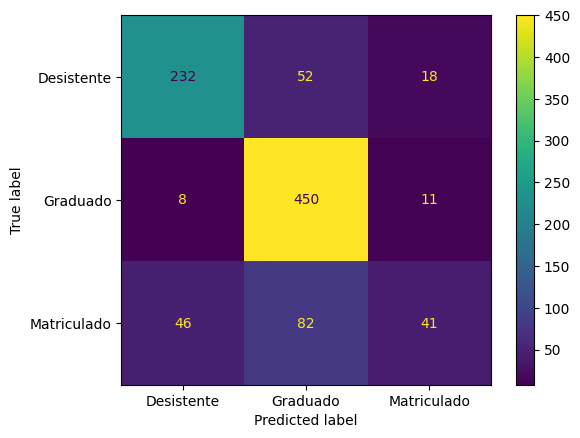

In [193]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred = random_forest.predict(x_val)
matriz_confusao = confusion_matrix(y_val, y_pred)
visualizacao = ConfusionMatrixDisplay(matriz_confusao, display_labels=random_forest.classes_)
visualizacao.plot()

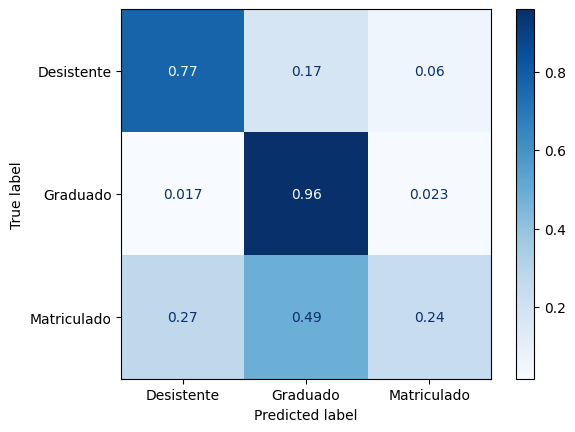

In [194]:
ConfusionMatrixDisplay.from_predictions(y_val, y_pred, normalize="true", cmap="Blues")

## Relatórios de Métricas

In [195]:
from sklearn.metrics import classification_report

report = classification_report(y_val, y_pred)
print(f"Relatório de Métricas do Modelo:\n {report}")

Relatório de Métricas do Modelo:
               precision    recall  f1-score   support

  Desistente       0.81      0.77      0.79       302
    Graduado       0.77      0.96      0.85       469
 Matriculado       0.59      0.24      0.34       169

    accuracy                           0.77       940
   macro avg       0.72      0.66      0.66       940
weighted avg       0.75      0.77      0.74       940



## Oversampling

In [196]:
from imblearn.over_sampling import SMOTE

oversampling_model = SMOTE(random_state=SEED)
x_balanced, y_balanced = oversampling_model.fit_resample(x_train, y_train)
rf_model = RandomForestClassifier(max_depth=10, random_state=SEED)
rf_model.fit(x_balanced, y_balanced)
y_pred = rf_model.predict(x_val)

              precision    recall  f1-score   support

  Desistente       0.84      0.72      0.78       302
    Graduado       0.81      0.86      0.83       469
 Matriculado       0.48      0.51      0.49       169

    accuracy                           0.75       940
   macro avg       0.71      0.70      0.70       940
weighted avg       0.76      0.75      0.75       940



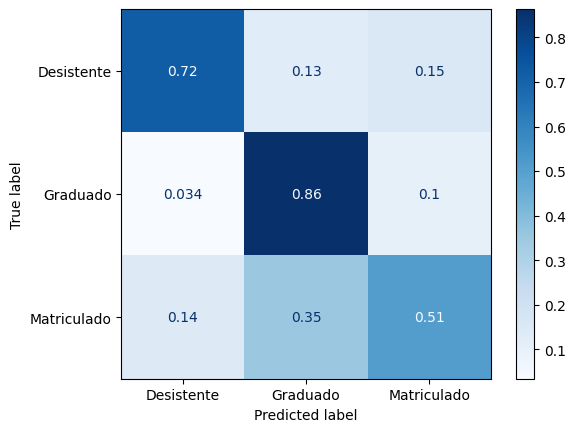

In [197]:
print(classification_report(y_val, y_pred))
ConfusionMatrixDisplay.from_predictions(y_val, y_pred, normalize="true", cmap="Blues")